In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [175]:
df = pd.read_csv(r"C:\Users\yarde\Downloads\audible_raw.csv")
df.head()

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         87489 non-null  object
 1   author       87489 non-null  object
 2   narrator     87489 non-null  object
 3   time         87489 non-null  object
 4   releasedate  87489 non-null  object
 5   language     87489 non-null  object
 6   stars        87489 non-null  object
 7   price        87489 non-null  object
dtypes: object(8)
memory usage: 5.3+ MB


***Clean text data in Author and Narrator columns***

In [177]:
df['author']= df['author'].str.replace('Writtenby:','')
df['narrator']= df['narrator'].str.replace('Narratedby:','')
df.head()

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,RickRiordan,RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,JeffKinney,DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,RickRiordan,SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00


***Extract number of stars and ratings from Stars column***

In [178]:
df['stars'].sample(n=10)
# Not rated yet - not everything is rated

5914     Not rated yet
45059    Not rated yet
4050     Not rated yet
74589    Not rated yet
76212    Not rated yet
55693    Not rated yet
59965    Not rated yet
19308    Not rated yet
42627    Not rated yet
46097    Not rated yet
Name: stars, dtype: object

In [179]:
df['stars'].replace('Not rated yet', np.nan, inplace=True)
# extract the numerical part (including decimals) from the beginning of each string in the column, matches any digit or a dot
df['rating_stars'] = df['stars'].str.extract('^([\d.]+)').astype(float)
df['n_ratings'] = df['stars'].str.replace(',','').str.extract('(\d+) rating').astype(float)
df[['rating_stars','n_ratings']]

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
C:\Users\yarde\AppData\Local\Temp\ipykernel_28412\4167988440.py:3: SyntaxWarning: invalid escape sequence '\d'
  df['rating_stars'] = df['stars'].str.extract('^([\d.]+)').astype(float)
C:\Users\yarde\AppData\Local\Temp\ipykernel_28412\4167988440.py:4: SyntaxWarning: invalid escape sequence '\d'
  df['n_ratings'] = df['stars'].str.replace(',','').str.extract('(\d+) rating').astype(float)
C:\Users\yarde\AppData\Local\Temp\ipykernel_28412\4167988440.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

,rating_stars,n_ratings
0,5.0,34.0
1,4.5,41.0
2,4.5,38.0
3,4.5,12.0
4,4.5,181.0
...,...,...
87484,NaN,NaN
87485,NaN,NaN
87486,NaN,NaN
87487,NaN,NaN


In [180]:
#axis=1 drop column not row
df.drop(columns=['stars'], axis=1, inplace=True)

***Change data types***

In [181]:
df['price'].sample(n=10)

40959      258.00
25802      755.00
4858       149.00
71537    1,005.00
18568      190.00
82332      836.00
14065      166.00
69098      586.00
6244       979.00
42913      773.00
Name: price, dtype: object

In [182]:
df['price'] = df['price'].str.replace(',','')
df['price'] = df['price'].str.replace('Free','0')
df['price'] = df['price'].astype(float)
df['price'].dtype

dtype('float64')

In [183]:
df['rating_stars'].unique()

array([5. , 4.5, 4. , nan, 3.5, 3. , 1. , 2. , 2.5, 1.5])

In [184]:
df['rating_stars'] = df['rating_stars'].astype('category')

In [185]:
df['releasedate'] = pd.to_datetime(df['releasedate'])
df.info()

C:\Users\yarde\AppData\Local\Temp\ipykernel_28412\1622218703.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['releasedate'] = pd.to_datetime(df['releasedate'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          87489 non-null  object        
 1   author        87489 non-null  object        
 2   narrator      87489 non-null  object        
 3   time          87489 non-null  object        
 4   releasedate   87489 non-null  datetime64[ns]
 5   language      87489 non-null  object        
 6   price         87489 non-null  float64       
 7   rating_stars  15072 non-null  category      
 8   n_ratings     15072 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(2), object(5)
memory usage: 5.4+ MB


In [186]:
df['time'].sample(10)

35625     6 hrs and 27 mins
85331     7 hrs and 48 mins
19128      2 hrs and 9 mins
66899     6 hrs and 23 mins
54439    14 hrs and 16 mins
40864      5 hrs and 6 mins
17930     8 hrs and 45 mins
10029                6 mins
86452      1 hr and 24 mins
38104    11 hrs and 50 mins
Name: time, dtype: object

In [187]:
df['time']= df['time'].str.replace('Less than 1 minute', '1 min')
#fillna for the NaN
df['time']= df['time'].replace('hrs', 'hr')
df['time']= df['time'].replace('mins', 'min')

In [188]:
hours = df['time'].str.extract(r'(\d+) hr').fillna(0).astype(int)
minutes = df['time'].str.extract(r'(\d+) min').fillna(0).astype(int)

df['time_mins'] = (hours * 60) + minutes
df[['time_mins']]

,time_mins
0,140
1,788
2,123
3,676
4,600
...,...
87484,454
87485,607
87486,1144
87487,248


In [189]:
df.drop(columns=['time'], axis=1, inplace=True)

***Check data ranges***

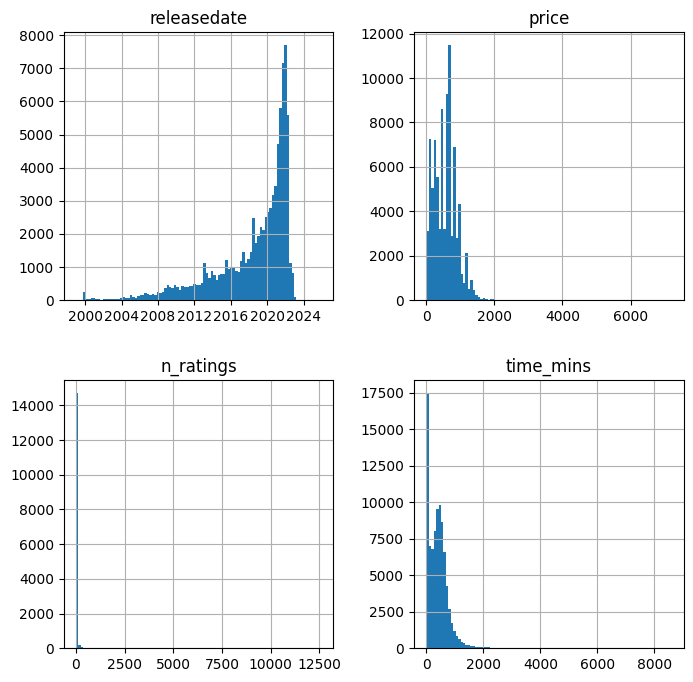

In [192]:
df.hist(figsize=(8,8), bins=100)
plt.show()

In [193]:
df.describe()

,releasedate,price,n_ratings,time_mins
count,87489,87489.000000,15072.000000,87489.000000
mean,2018-06-22 01:35:29.780886528,559.009246,21.613190,417.497663
min,1998-12-27 00:00:00,0.000000,1.000000,1.000000
25%,2016-08-30 00:00:00,268.000000,1.000000,142.000000
50%,2020-01-30 00:00:00,585.000000,2.000000,386.000000
75%,2021-08-04 00:00:00,755.000000,7.000000,584.000000
max,2025-11-14 00:00:00,7198.000000,12573.000000,8595.000000
std,NaN,336.096642,207.479634,364.559399


In [194]:
#without number columns
df.describe(exclude=[np.number])

,name,author,narrator,releasedate,language,rating_stars
count,87489,87489,87489,87489,87489,15072.0
unique,82767,48374,29717,NaN,36,9.0
top,The Art of War,"矢島雅弘,石橋遊",anonymous,NaN,English,5.0
freq,20,874,1034,NaN,61884,6761.0
mean,NaN,NaN,NaN,2018-06-22 01:35:29.780886528,NaN,NaN
min,NaN,NaN,NaN,1998-12-27 00:00:00,NaN,NaN
25%,NaN,NaN,NaN,2016-08-30 00:00:00,NaN,NaN
50%,NaN,NaN,NaN,2020-01-30 00:00:00,NaN,NaN
75%,NaN,NaN,NaN,2021-08-04 00:00:00,NaN,NaN
max,NaN,NaN,NaN,2025-11-14 00:00:00,NaN,NaN


In [195]:
#change to USD
df['price'] = df.price * 0.012

In [196]:
df.language.unique()

array(['English', 'Hindi', 'spanish', 'german', 'french', 'catalan',
       'swedish', 'italian', 'danish', 'finnish', 'dutch', 'hebrew',
       'russian', 'polish', 'galician', 'afrikaans', 'icelandic',
       'romanian', 'japanese', 'tamil', 'portuguese', 'urdu', 'hungarian',
       'czech', 'bulgarian', 'mandarin_chinese', 'basque', 'korean',
       'arabic', 'greek', 'turkish', 'ukrainian', 'slovene', 'norwegian',
       'telugu', 'lithuanian'], dtype=object)

In [197]:
df['language'] = df.language.str.capitalize()

***Checking for duplicates***

In [199]:
df.duplicated().sum()

0

In [200]:
subset_cols = ['name','author','narrator','time_mins','price']
df.duplicated(subset=subset_cols).sum()

70

In [202]:
#The keeps=False ensures that all occurrences of duplicates are marked as True.
df[df.duplicated(subset=subset_cols, keep=False)].sort_values(by='name')

,name,author,narrator,releasedate,language,price,rating_stars,n_ratings,time_mins
63978,"""Das Böse ist des Menschen beste Kraft""",ChristianLiederer,ThomasKrause,2021-12-14,German,2.796,NaN,NaN,144
63965,"""Das Böse ist des Menschen beste Kraft""",ChristianLiederer,ThomasKrause,2021-12-23,German,2.796,NaN,NaN,144
24625,90 Minutes in Heaven,"DonPiper,CecilMurphey",DonPiper,2015-09-25,English,7.032,NaN,NaN,495
24116,90 Minutes in Heaven,"DonPiper,CecilMurphey",DonPiper,2020-10-15,English,7.032,NaN,NaN,495
16971,Adagio in Dm,BillBrown,BillBrown,2021-06-08,English,5.472,NaN,NaN,78
...,...,...,...,...,...,...,...,...,...
18338,What I Talk About When I Talk About Running,HarukiMurakami,RayPorter,2016-07-07,English,4.776,4.5,193.0,263
38021,When Women Ruled the World,KaraCooney,KaraCooney,2018-11-30,English,10.032,4.5,14.0,555
20260,When Women Ruled the World,KaraCooney,KaraCooney,2018-11-30,English,10.032,4.5,13.0,555
22158,Wings of Fire,"APJAbdulKalam,ArunTiwari",GirishKarnad,2020-01-04,English,0.900,5.0,1823.0,75


In [203]:
df.drop_duplicates(subset=subset_cols, keep='last', inplace=True)

In [204]:
df.duplicated(subset=subset_cols).sum()

0

 ***Dealing with missing data***

In [205]:
df.isna().sum()

name                0
author              0
narrator            0
releasedate         0
language            0
price               0
rating_stars    72387
n_ratings       72387
time_mins           0
dtype: int64

***Save***

In [ ]:
df.to_csv(r"C:\Users\yarde\Downloads\audible_clean.csv")